<a href="https://colab.research.google.com/github/N1a2t3a/.Data_Science/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [18]:
max_features = 10000
maxlen = 500

In [19]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [20]:
def plot_history(history, model_name):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [21]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

In [22]:
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 43s 262ms/step - loss: 0.6721 - accuracy: 0.5763 - val_loss: 0.6106 - val_accuracy: 0.6932
Epoch 2/5
157/157 [==============================] - 29s 188ms/step - loss: 0.4284 - accuracy: 0.8113 - val_loss: 0.4226 - val_accuracy: 0.8134
Epoch 3/5
157/157 [==============================] - 29s 186ms/step - loss: 0.2704 - accuracy: 0.8924 - val_loss: 0.4205 - val_accuracy: 0.8288
Epoch 4/5
157/157 [==============================] - 28s 178ms/step - loss: 0.1478 - accuracy: 0.9487 - val_loss: 0.4813 - val_accuracy: 0.8108
Epoch 5/5
157/157 [==============================] - 28s 178ms/step - loss: 0.0736 - accuracy: 0.9797 - val_loss: 0.5263 - val_accuracy: 0.8176


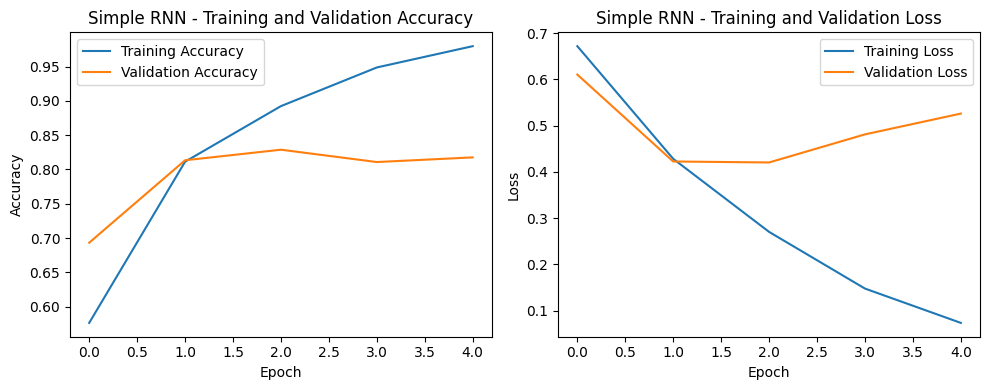

In [23]:
plot_history(model_rnn.history, 'Simple RNN')

In [24]:
score_rnn = model_rnn.evaluate(x_test, y_test)
print(f"\nSimple RNN Accuracy: {score_rnn[1]*100:.2f}%")

782/782 [==============================] - 22s 28ms/step - loss: 0.5378 - accuracy: 0.8172

Simple RNN Accuracy: 81.72%


In [25]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

In [26]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 64s 396ms/step - loss: 0.5095 - accuracy: 0.7396 - val_loss: 0.3433 - val_accuracy: 0.8572
Epoch 2/5
157/157 [==============================] - 57s 363ms/step - loss: 0.2607 - accuracy: 0.8978 - val_loss: 0.2915 - val_accuracy: 0.8786
Epoch 3/5
157/157 [==============================] - 59s 378ms/step - loss: 0.1802 - accuracy: 0.9355 - val_loss: 0.3379 - val_accuracy: 0.8628
Epoch 4/5
157/157 [==============================] - 58s 371ms/step - loss: 0.1431 - accuracy: 0.9513 - val_loss: 0.3384 - val_accuracy: 0.8720
Epoch 5/5
157/157 [==============================] - 60s 384ms/step - loss: 0.1139 - accuracy: 0.9633 - val_loss: 0.3427 - val_accuracy: 0.8728


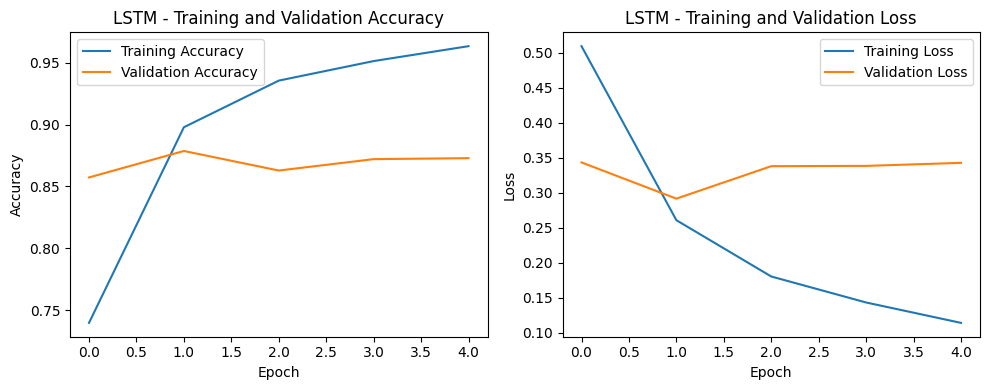

In [27]:
plot_history(model_lstm.history, 'LSTM')

In [28]:
score_lstm = model_lstm.evaluate(x_test, y_test)
print(f"\nLSTM Accuracy: {score_lstm[1]*100:.2f}%")

782/782 [==============================] - 41s 52ms/step - loss: 0.3711 - accuracy: 0.8603

LSTM Accuracy: 86.03%


In [29]:
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(max_features, 32))
model_bidirectional.add(Bidirectional(LSTM(32)))
model_bidirectional.add(Dense(1, activation='sigmoid'))

In [30]:
model_bidirectional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bidirectional.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 111s 682ms/step - loss: 0.5669 - accuracy: 0.7157 - val_loss: 0.3760 - val_accuracy: 0.8470
Epoch 2/5
157/157 [==============================] - 107s 681ms/step - loss: 0.3113 - accuracy: 0.8786 - val_loss: 0.3228 - val_accuracy: 0.8668
Epoch 3/5
157/157 [==============================] - 105s 669ms/step - loss: 0.2156 - accuracy: 0.9223 - val_loss: 0.3562 - val_accuracy: 0.8750
Epoch 4/5
157/157 [==============================] - 107s 681ms/step - loss: 0.1725 - accuracy: 0.9402 - val_loss: 0.3296 - val_accuracy: 0.8812
Epoch 5/5
157/157 [==============================] - 105s 671ms/step - loss: 0.1345 - accuracy: 0.9561 - val_loss: 0.3399 - val_accuracy: 0.8786


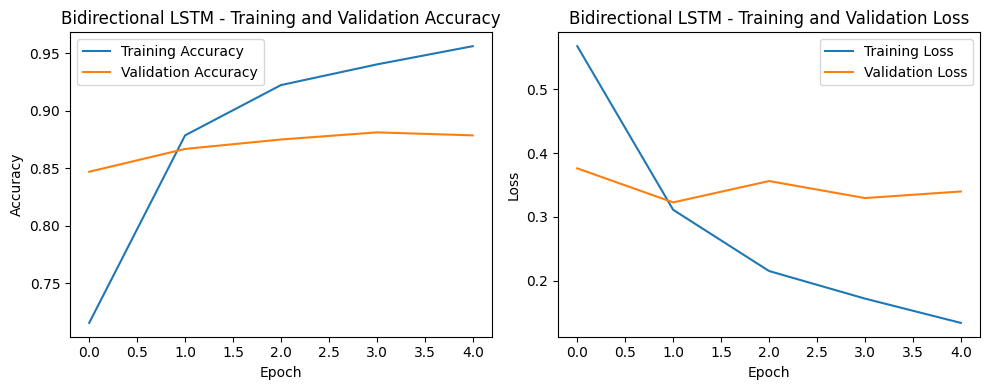

In [31]:
plot_history(model_bidirectional.history, 'Bidirectional LSTM')

In [32]:
score_bidirectional = model_bidirectional.evaluate(x_test, y_test)
print(f"\nBidirectional LSTM Accuracy: {score_bidirectional[1]*100:.2f}%")

782/782 [==============================] - 66s 85ms/step - loss: 0.3617 - accuracy: 0.8668

Bidirectional LSTM Accuracy: 86.68%


In [33]:
model_deep_rnn = Sequential()
model_deep_rnn.add(Embedding(max_features, 32))
model_deep_rnn.add(LSTM(32, return_sequences=True))
model_deep_rnn.add(LSTM(32))
model_deep_rnn.add(Dense(1, activation='sigmoid'))

In [34]:
model_deep_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_deep_rnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 125s 762ms/step - loss: 0.4798 - accuracy: 0.7549 - val_loss: 0.3509 - val_accuracy: 0.8486
Epoch 2/5
157/157 [==============================] - 117s 747ms/step - loss: 0.2464 - accuracy: 0.9061 - val_loss: 0.2901 - val_accuracy: 0.8818
Epoch 3/5
157/157 [==============================] - 128s 814ms/step - loss: 0.1679 - accuracy: 0.9413 - val_loss: 0.3099 - val_accuracy: 0.8776
Epoch 4/5
157/157 [==============================] - 121s 769ms/step - loss: 0.1352 - accuracy: 0.9531 - val_loss: 0.3269 - val_accuracy: 0.8718
Epoch 5/5
157/157 [==============================] - 119s 760ms/step - loss: 0.0995 - accuracy: 0.9679 - val_loss: 0.4044 - val_accuracy: 0.8728


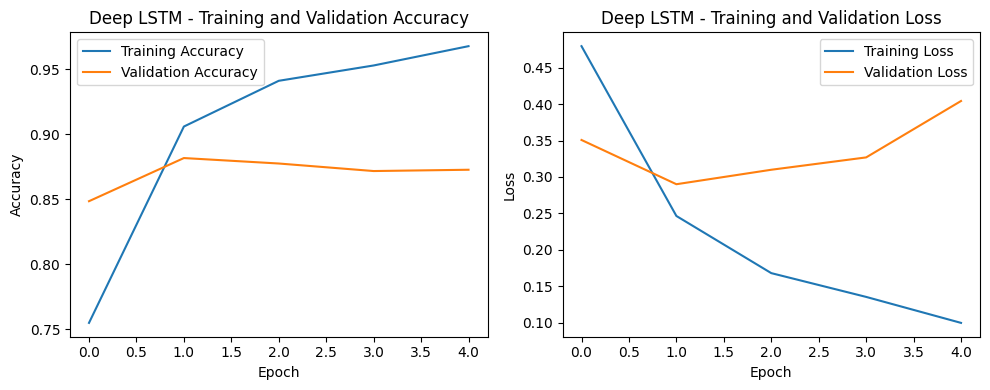

In [35]:
plot_history(model_deep_rnn.history, 'Deep LSTM')

In [36]:
score_deep_rnn = model_deep_rnn.evaluate(x_test, y_test)
print(f"\nDeep LSTM Accuracy: {score_deep_rnn[1]*100:.2f}%")

782/782 [==============================] - 79s 101ms/step - loss: 0.4339 - accuracy: 0.8589

Deep LSTM Accuracy: 85.89%


In [ ]:
score_deep_rnn = model_deep_rnn.evaluate(x_test, y_test)
print(f"\nDeep LSTM Accuracy: {score_deep_rnn[1]*100:.2f}%")

782/782 [==============================] - 79s 101ms/step - loss: 0.4339 - accuracy: 0.8589

Deep LSTM Accuracy: 85.89%


In [ ]:
score_deep_rnn = model_deep_rnn.evaluate(x_test, y_test)
print(f"\nDeep LSTM Accuracy: {score_deep_rnn[1]*100:.2f}%")

782/782 [==============================] - 79s 101ms/step - loss: 0.4339 - accuracy: 0.8589

Deep LSTM Accuracy: 85.89%


# Висновок

Проста RNN:

Accuracy: 81.72%
Проста RNN показала непогані результати.

LSTM:

Accuracy: 86.03%
LSTM показала велике покращення в порівнянні з простою RNN, оскільки вона здатна краще управляти довгостроковими залежностями.

Двостороння LSTM:

Accuracy: 86.68%
Двостороння LSTM показала невелике поліпшення в порівнянні зі звичайною LSTM.

Глибока рекурентна мережа:

Accuracy: 85.89%
Глибока рекурентна мережа не дала значного поліпшення в точності порівняно зі звичайною LSTM.